<a href="https://colab.research.google.com/github/jayu071/Seoul-Bike-Sharing-Demand_JN/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

>Our objective is to find a way to estimate the value prediction of bike count required at each hour for the stable supply of rental bikes. using the values in the other columns. If we can do so for the historical data, then we should able to estimate bike count required at each hour.

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

> All the Lifecycle In A Data Science Projects
1. Data Analysis
2. Feature Engineering
3. Feature Selection
4. Model Building
5. Model Deployment

#Step 1 - Download and Explore the Data


In [1]:
import pandas as pd
import numpy as np
## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We can now create a Pandas dataframe using the downloaded file, to view and analyze the data.

In [3]:
# Read the csv file
data=pd.read_csv("/content/drive/MyDrive/Almabetter /CapstoneProject/bike sharing demand prediction/SeoulBikeData.csv",encoding= 'unicode_escape')

In [4]:
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


The dataset contains 8760 rows and 14 columns. Each row of the dataset contains information about weather conditions

Our objective is to find a way to estimate the value prediction of bike count required at each hour for the stable supply of rental bikes. using the values in the other columns. If we can do so for the historical data, then we should able to estimate bike count required at each hour.

Let's check the data type for each column.

In [ ]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Check for duplicated entries.
print("Duplicate entry in data:",len(data[data.duplicated()])) 

Duplicate entry in data: 0


In [7]:
# Custom Function for Dtype,Unique values and Null values
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

In [8]:
# Shape of the data.
print("Total Rows and Columns in DataFrame is :",data.shape,"\n") 
# Custom Function
datainfo()

Total Rows and Columns in DataFrame is : (8760, 14) 



,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Date,object,8760,365,0,0.0
Rented Bike Count,int64,8760,2166,0,0.0
Hour,int64,8760,24,0,0.0
Temperature(°C),float64,8760,546,0,0.0
Humidity(%),int64,8760,90,0,0.0
Wind speed (m/s),float64,8760,65,0,0.0
Visibility (10m),int64,8760,1789,0,0.0
Dew point temperature(°C),float64,8760,556,0,0.0
Solar Radiation (MJ/m2),float64,8760,345,0,0.0
Rainfall(mm),float64,8760,61,0,0.0


Looks like "Seasons", "Holiday", "Functioning Day" are strings (possibly categories) and rest columns are numerical data. None of the columns contain any missing values, which saves us a fair bit of work!

Here are some statistics for the numerical columns:

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


The ranges of values in the numerical columns seem reasonable too, so we may not have to do much data cleaning or correction. The "Wind speed","Dew point temperature(°C)", "Solar Radiation", "Rainfall" and "Snowfall" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

## Exploratory Analysis and Visualization

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "Rented Bike count" and other columns.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization.

In [10]:
# The following settings will improve the default style and font sizes for our charts.
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [11]:
# pip install -U dataprep

In [12]:
# from dataprep.eda import create_report
# report=create_report(data)
# report

### Numerical Variables

In [ ]:
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
# visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  10


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0


#### Numerical variables are usually of 2 type

####Discrete Variables

Discrete Variables Count: 1


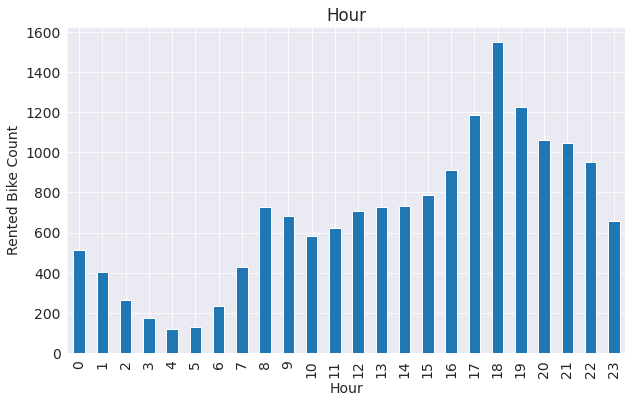

In [ ]:
## Lets analyse the discrete values by creating histograms to understand the distribution
discrete_feature=[feature for feature in numerical_features if len(data[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

## Lets Find the realtionship between them and Sale PRice
for feature in discrete_feature:
    dataset=data.copy()
    dataset.groupby(feature)['Rented Bike Count'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Rented Bike Count')
    plt.title(feature)
    plt.show()

####Continuous Variables

Continuous feature Count 9


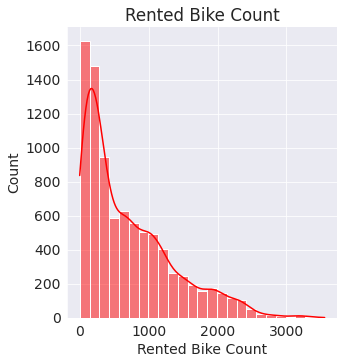

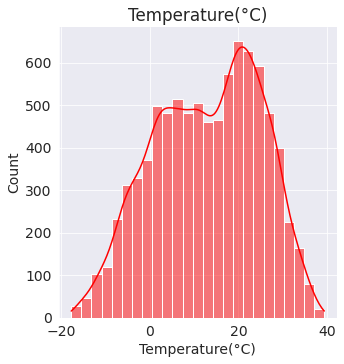

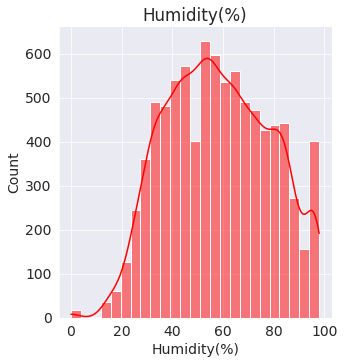

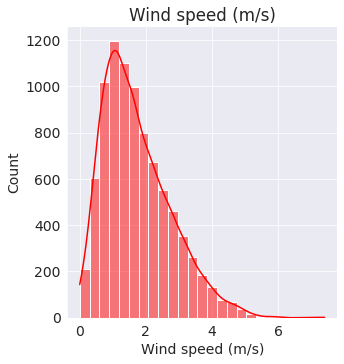

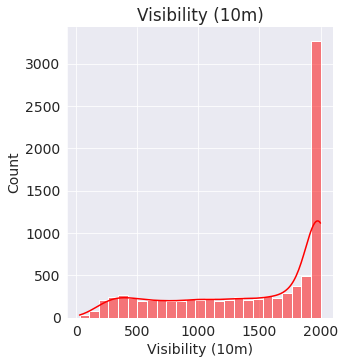

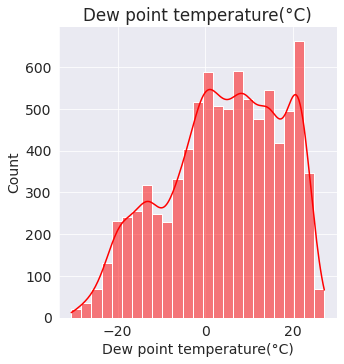

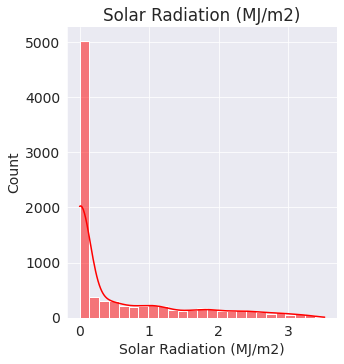

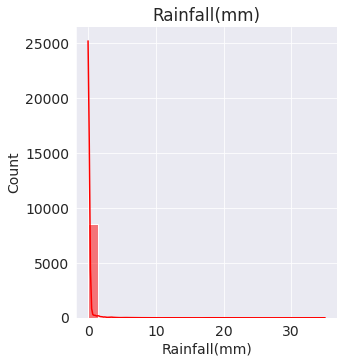

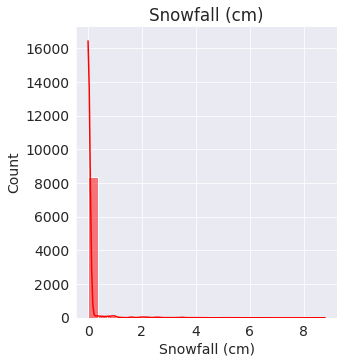

In [ ]:
## Lets analyse the continuous values by creating histograms to understand the distribution
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

for feature in continuous_feature:
    dataset=data.copy()
    sns.displot(dataset[feature],kde=True,bins=25,color="r")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

### Categorical Variables

In [ ]:
# list of categorical variables
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']
categorical_features = ['Seasons', 'Holiday', 'Functioning Day']
print('Number of categorical variables: ', len(categorical_features))
# visualise the categorical variables
data[categorical_features].head()

Number of categorical variables:  3


,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes


In [ ]:
# Unique number of categorical features
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is Seasons and number of categories are 4
The feature is Holiday and number of categories are 2
The feature is Functioning Day and number of categories are 2


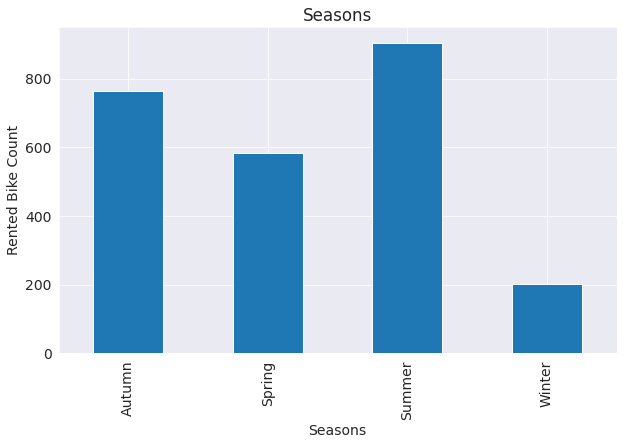

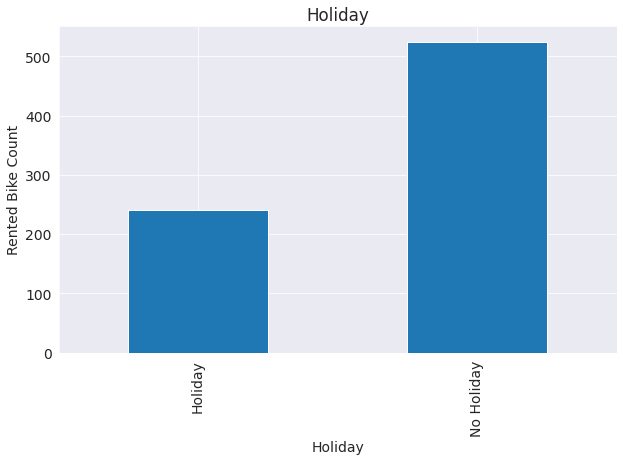

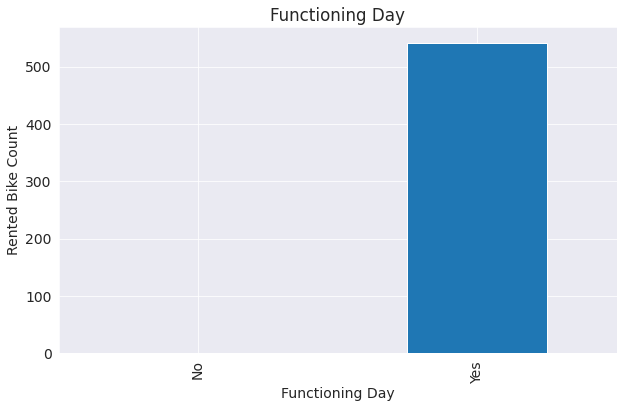

In [ ]:
#Find out the relationship between categorical variable and dependent feature Rented Bike Count
for feature in categorical_features:
    dataset=data.copy()
    dataset.groupby(feature)['Rented Bike Count'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Rented Bike Count')
    plt.title(feature)
    plt.show()

### Outliers

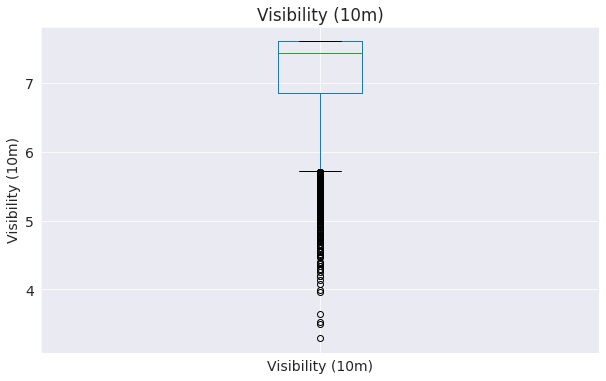

In [ ]:
for feature in numerical_features:
    dataset=data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
        dataset.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()   

# Step 2 - Prepare the Dataset for Training


Before we can train the model, we need to prepare the dataset. Here are the steps we'll follow:

1. Identify the input and target column(s) for training the model.
2. Identify numeric and categorical input columns.
3. [Impute](https://scikit-learn.org/stable/modules/impute.html) (fill) missing values in numeric columns
4. [Scale](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) values in numeric columns to a $(0,1)$ range.
5. [Encode](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features) categorical data into one-hot vectors.
6. Split the dataset into training and validation sets.


Date

First, let's convert `Date` to a `datecolumn` and extract different parts of the date.

In [ ]:
def split_date(df):
  df['Date'] = pd.to_datetime(df["Date"])
  df["Year"] = df.Date.dt.year
  df["Month"] = df.Date.dt.month
  df["Day"] = df.Date.dt.day
  df['Weekofyear']= df.Date.dt.isocalendar().week

split_date(data)  

## Identify Inputs and Targets

While the dataset contains `18` columns, not all of them are useful for modeling. Note the following:

- The first column is `date` and isn't useful for training the model.
- The second column `Rented Bike Count` contains the value we need to predict i.e. it's the target column.
- Data from all the other columns (except the first and the last column) can be used as inputs to the model.
 

>Create a list `input_cols` of column names containing data that can be used as input to train the model, and identify the target column as the variable `target_col`.

In [ ]:
# Identify the input columns (a list of column names)
input_cols=list(data.columns)[2:]
# Identify the name of the target column 
target_cols=list(data.columns)[1]

In [ ]:
# It always a good practice whatever code u execute, print and check it 
input_cols

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day',
 'Year',
 'Month',
 'Day',
 'Weekofyear']

In [ ]:
# It always a good practice whatever code u execute, print and check it 
target_cols

'Rented Bike Count'

>Make sure that the `Date` and `Rented Bike Count` columns are not included in `input_cols`.

Now that we've identified the input and target columns, we can separate input & target data.

In [ ]:
# Separate input & target data
inputs_df = data[input_cols] 
targets = data[target_cols]

In [ ]:
# It always a good practice whatever code u execute, print and check it 
inputs_df

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Month,Day,Weekofyear
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,2
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,2
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,2
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,2
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,1,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,48
8756,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,48
8757,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,48
8758,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,2018,11,30,48


In [ ]:
# It always a good practice whatever code u execute, print and check it 
targets

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

##Identify Numeric and Categorical Data
The next step in data preparation is to identify numeric and categorical columns. We can do this by looking at the data type of each column.

>Crate two lists `numeric_cols` and `categorical_cols` containing names of numeric and categorical input columns within the dataframe respectively. Numeric columns have data types `int64` and `float64`, whereas categorical columns have the data type `object`.
>
> *Hint*: See this [StackOverflow question](https://stackoverflow.com/questions/25039626/how-do-i-find-numeric-columns-in-pandas).

In [ ]:
# identifying Numerical and Categorical columns
numeric_cols = inputs_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols= inputs_df.select_dtypes(include=[object]).columns.tolist()

In [ ]:
# It always a good practice whatever code u execute, print and check it 
numeric_cols

['Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Year',
 'Month',
 'Day',
 'Weekofyear']

In [ ]:
# It always a good practice whatever code u execute, print and check it 
categorical_cols

['Seasons', 'Holiday', 'Functioning Day']

##Scale Numerical Values
The numeric columns in our dataset have varying ranges.

In [ ]:
# using isna() to calculate the null values in Numeric columns
inputs_df[numeric_cols].describe().loc[['min','max']]

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,Weekofyear
min,0.0,-17.8,0.0,0.0,27.0,-30.6,0.00,0.0,0.0,2017.0,1.0,1.0,1.0
max,23.0,39.4,98.0,7.4,2000.0,27.2,3.52,35.0,8.8,2018.0,12.0,31.0,52.0


A good practice is to [scale numeric features](https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range) to a small range of values e.g. $(0,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.


>Scale numeric values to the $(0, 1)$ range using `MinMaxScaler` from `sklearn.preprocessing`.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Create the scaler
scaler=MinMaxScaler()
# Fit the scaler to the numeric columns
scaler.fit(inputs_df[numeric_cols])
# Transform and replace the numeric columns
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)



After scaling, the ranges of all numeric columns should be (0, 1).

In [ ]:
# using isna() to calculate the null values in Numeric columns
inputs_df[numeric_cols].describe().loc[['min','max']]

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,Weekofyear
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


##Encode Categorical Columns
Our dataset contains several categorical columns, each with a different number of categories.

In [ ]:
# Printing unique Categorical columns 
inputs_df[categorical_cols].nunique().sort_values(ascending=False)

Seasons            4
Holiday            2
Functioning Day    2
dtype: int64



Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

>Encode categorical columns in the dataset as one-hot vectors using `OneHotEncoder` from `sklearn.preprocessing`. Add a new binary (0/1) column for each category

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# 1. Create the encoder
encoder=OneHotEncoder(sparse=False, handle_unknown= "ignore")
# 2. Fit the encoder to thr categorical columns
encoder.fit(inputs_df[categorical_cols])
# 3. Generate column names for each category
encoded_cols= list(encoder.get_feature_names(categorical_cols))
# 4. Transform and add new one-hot category columns
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


The new one-hot category columns should now be added to `inputs_df`.

In [ ]:
input = inputs_df[numeric_cols + encoded_cols]
target = targets

##Feature Selection

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(input, target)


SelectFromModel(estimator=Lasso(alpha=0.05, random_state=0))

In [ ]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True, False])

In [ ]:
# let's print the number of total and selected features
# this is how we can make a list of the selected features
selected_feat = input.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((input.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 21
selected features: 17


In [ ]:
selected_feat

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Year',
       'Month', 'Day', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Winter',
       'Holiday_Holiday', 'Functioning Day_No'],
      dtype='object')

In [ ]:
input=input[selected_feat]

##Training and Validation Set
Finally, let's split the dataset into a training and validation set. We'll use a randomly select 25% subset of the data for validation. Also, we'll use just the numeric and encoded columns, since the inputs to our model must be numbers.

In [ ]:
# Import train_test_split from sklearn library to make split of data into train sets and validation sets
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets, val_targets = train_test_split(input,target,test_size=0.25,random_state=42)

In [ ]:
# It always a good practice to print and check the executed codes.
train_inputs

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,Seasons_Autumn,Seasons_Spring,Seasons_Winter,Holiday_Holiday,Functioning Day_No
2223,0.652174,0.590909,0.142857,0.297297,0.912823,0.330450,0.661932,0.000000,0.0,1.0,0.181818,0.066667,0.0,1.0,0.0,0.0,0.0
798,0.260870,0.194056,0.489796,0.324324,0.995438,0.254325,0.000000,0.000000,0.0,1.0,0.181818,0.000000,0.0,0.0,1.0,0.0,0.0
7752,0.000000,0.508741,0.724490,0.162162,0.998479,0.636678,0.000000,0.000000,0.0,1.0,0.818182,0.633333,1.0,0.0,0.0,0.0,0.0
734,0.608696,0.363636,0.285714,0.513514,0.977699,0.292388,0.312500,0.000000,0.0,0.0,1.000000,1.000000,0.0,0.0,1.0,1.0,0.0
2881,0.043478,0.512238,0.785714,0.270270,0.286873,0.660900,0.000000,0.000000,0.0,1.0,0.181818,1.000000,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.956522,0.833916,0.755102,0.270270,0.595033,0.956747,0.000000,0.000000,0.0,1.0,0.545455,0.866667,0.0,0.0,0.0,0.0,0.0
5191,0.304348,0.722028,0.918367,0.067568,0.211860,0.904844,0.014205,0.014286,0.0,1.0,0.363636,0.200000,0.0,0.0,0.0,0.0,0.0
5390,0.608696,0.826923,0.632653,0.364865,0.970096,0.899654,0.508523,0.000000,0.0,1.0,0.545455,0.400000,0.0,0.0,0.0,0.0,0.0
860,0.869565,0.251748,0.520408,0.148649,0.691333,0.320069,0.000000,0.000000,0.0,1.0,0.363636,0.000000,0.0,0.0,1.0,0.0,0.0


In [ ]:
# It always a good practice to print and check the executed codes.
train_targets

2223    1238
798      137
7752     891
734      262
2881     502
        ... 
5734    1507
5191     828
5390     999
860      322
7270    1501
Name: Rented Bike Count, Length: 6570, dtype: int64

In [ ]:
# It always a good practice to print and check the executed codes.
val_inputs

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Year,Month,Day,Seasons_Autumn,Seasons_Spring,Seasons_Winter,Holiday_Holiday,Functioning Day_No
6056,0.347826,0.786713,0.704082,0.243243,0.999493,0.892734,0.198864,0.0,0.0,1.0,0.818182,0.233333,0.0,0.0,0.0,0.0,0.0
5556,0.521739,0.881119,0.520408,0.283784,0.391789,0.894464,0.911932,0.0,0.0,1.0,0.545455,0.633333,0.0,0.0,0.0,0.0,0.0
5990,0.608696,0.905594,0.510204,0.162162,0.870248,0.911765,0.477273,0.0,0.0,1.0,0.545455,0.233333,0.0,0.0,0.0,0.0,0.0
7674,0.782609,0.606643,0.479592,0.189189,0.816016,0.624567,0.031250,0.0,0.0,1.0,0.818182,0.500000,1.0,0.0,0.0,0.0,0.0
3319,0.304348,0.423077,0.520408,0.135135,0.694881,0.477509,0.053977,0.0,0.0,1.0,0.272727,0.566667,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1129,0.043478,0.368881,0.653061,0.054054,0.158135,0.480969,0.000000,0.0,0.0,1.0,0.000000,0.533333,0.0,0.0,1.0,0.0,0.0
4315,0.826087,0.701049,0.724490,0.337838,0.628991,0.818339,0.039773,0.0,0.0,1.0,0.363636,0.933333,0.0,1.0,0.0,0.0,0.0
6008,0.347826,0.811189,0.816327,0.216216,0.345160,0.958478,0.139205,0.0,0.0,1.0,0.636364,0.233333,0.0,0.0,0.0,0.0,0.0
3438,0.260870,0.470280,0.969388,0.364865,0.175367,0.673010,0.000000,0.2,0.0,1.0,0.272727,0.733333,0.0,1.0,0.0,0.0,0.0


In [ ]:
# It always a good practice to print and check the executed codes.
val_targets

6056    1728
5556     822
5990     658
7674    2716
3319    1083
        ... 
1129     183
4315     477
6008    1693
3438       5
208      546
Name: Rented Bike Count, Length: 2190, dtype: int64

# Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from xgboost import plot_importance
import lightgbm 

In [ ]:
models = [
           ['LinearRegression: ',              LinearRegression()],
           ['Lasso: ',                         Lasso()],
           ['Ridge: ',                         Ridge()],
           ['KNeighborsRegressor: ',           neighbors.KNeighborsRegressor()],
           ['SVR:' ,                           SVR(kernel='rbf')],
           ['DecisionTree ',                   DecisionTreeRegressor(random_state=42)],
           ['RandomForest ',                   RandomForestRegressor(random_state=42)],
           ['ExtraTreeRegressor :',            ExtraTreesRegressor(random_state=42)],
           ['GradientBoostingRegressor: ',     GradientBoostingRegressor(random_state=42)],
           ['XGBRegressor: ',                  xgb.XGBRegressor(random_state=42)] ,
           ['Light-GBM: ',                     lightgbm.LGBMRegressor(num_leaves=41, n_estimators=200,random_state=42)],
]

In [ ]:
# Run all the proposed models and update the information in a list model_data
import time
from math import sqrt
from sklearn import metrics

model_data = []
for name,model in models :

    model_data_dic = {}
    model_data_dic["Name"] = name

    start = time.time()
    end = time.time()

    model.fit(train_inputs,train_targets)
    
    model_data_dic["Train_Time"] = end - start
    # Training set
    model_data_dic["Train_R2_Score"] = metrics.r2_score(train_targets,model.predict(train_inputs))
    model_data_dic["Train_RMSE_Score"] = metrics.mean_squared_error(train_targets,model.predict(train_inputs),squared=False)
    # Validation set
    model_data_dic["Test_R2_Score"] = metrics.r2_score(val_targets,model.predict(val_inputs))
    model_data_dic["Test_RMSE_Score"] = metrics.mean_squared_error(val_targets,model.predict(val_inputs),squared=False)

    model_data.append(model_data_dic)

[13:28:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
# Convert list to dataframe
df = pd.DataFrame(model_data)
df

,Name,Train_Time,Train_R2_Score,Train_RMSE_Score,Test_R2_Score,Test_RMSE_Score
0,LinearRegression:,7.152557e-07,0.557211,430.332511,0.532898,437.193892
1,Lasso:,9.536743e-07,0.552429,432.649707,0.534336,436.520641
2,Ridge:,4.768372e-07,0.556914,430.476869,0.535046,436.187574
3,KNeighborsRegressor:,7.152557e-07,0.870848,232.410527,0.775204,303.293161
4,SVR:,4.768372e-07,0.267396,553.528790,0.263857,548.844626
5,DecisionTree,2.384186e-07,1.000000,0.000000,0.760802,312.857854
6,RandomForest,4.768372e-07,0.983509,83.047059,0.865977,234.184380
7,ExtraTreeRegressor :,7.152557e-07,1.000000,0.002966,0.877391,223.990026
8,GradientBoostingRegressor:,7.152557e-07,0.859880,242.078249,0.830168,263.619781
9,XGBRegressor:,9.536743e-07,0.859566,242.348909,0.830207,263.589556


As we can see clearly out of 12 models Lightgbm, ExtraTree and XGboost give as max R2 score and Less RMSE on test set. 

> create a function to calculate performence metrics 

In [ ]:
# Import metrics from sklearn library
from sklearn import metrics

def evaluate_train(model, train_inputs,train_targets):
    # Prediction on Train inputs
    predictions = model.predict(train_inputs)
    print('Train_Data - Model Performance')
    print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(train_targets, predictions, squared=False))
    print('R^2:', metrics.r2_score(train_targets, predictions))


def evaluate_val(model, val_inputs,val_targets):
    # Prediction on val inputs
    predictions = model.predict(val_inputs)
    print('Validation_data - Model Performance')
    print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(val_targets, predictions, squared=False))
    print('R^2:', metrics.r2_score(val_targets, predictions))   


# Model-1 ExtraTreeRegressor

>Training

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
num_trees = 100
# Create the model
base_model = ExtraTreesRegressor(n_estimators=num_trees)
# Fit the model
base_model.fit(train_inputs,train_targets)

ExtraTreesRegressor()

> Evaluate

In [ ]:
evaluate_train(base_model, train_inputs,train_targets)

Train_Data - Model Performance
Root Mean Squared Error (RMSE): 0.00034894928172673974
R^2: 0.9999999999997089


In [ ]:
evaluate_val(base_model, val_inputs,val_targets)

Validation_data - Model Performance
Root Mean Squared Error (RMSE): 223.2073892004891
R^2: 0.878246776914274


## Hyperparameter Tuning

Just like decision trees, random forests also have several hyperparameters. In fact many of these hyperparameters are applied to the underlying decision trees. 

Let's study some the hyperparameters for random forests. You can learn more about them here.

>RandomSearch
* As the name suggests the RandomSearch algorithm tries random combinations of a range
of values of given parameters. The numerical parameters can be specified as a range
(unlike fixed values in GridSearch). You can control the number of iterations of random
searches that you would like to perform. It is known to find a very good combination in a
lot less time compared to GridSearch; however you have to carefully choose the range for
parameters and the number of random search iteration as it can miss the best parameter
combination with lesser iterations or smaller ranges.
Let’s try the RandomSearchCV for same combination that we tried for GridSearch
and compare the time / accuracy.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Create the random grid
random_grid ={'bootstrap': [True, False],
              'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200, 400, 600, 800, 1000]}

RF = ExtraTreesRegressor(n_jobs=-1, random_state=42)              

# Random search of parameters, using 3 fold cross validation,
random_search = RandomizedSearchCV(estimator = RF, 
                                   param_distributions = random_grid, 
                                   n_iter = 100, cv = 3, verbose=2)
# Fit the random search model
random_search.fit(train_inputs, train_targets)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   2.9s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   2.1s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=600; total time=   2.1s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   3.0s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   2.9s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   4.0s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=800

RandomizedSearchCV(cv=3,
                   estimator=ExtraTreesRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   verbose=2)

In [ ]:
#We can view the best parameters from fitting the random search
best_random_search= random_search.best_params_
best_random_search

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': False}

In [ ]:
best_random = random_search.best_estimator_

random_accuracy = evaluate_val(best_random, val_inputs, val_targets)

Validation_data - Model Performance
Root Mean Squared Error (RMSE): 222.7793829371192
R^2: 0.8787132594978816


In [ ]:
evaluate_train(best_random, train_inputs, train_targets)

Train_Data - Model Performance
Root Mean Squared Error (RMSE): 0.0033909125130617973
R^2: 0.999999999972507


In [ ]:
base_model = ExtraTreesRegressor(n_jobs=-1, random_state=42)
base_model.fit(train_inputs, train_targets)
base_accuracy = evaluate_train(base_model, val_inputs, val_targets)

Train_Data - Model Performance
Root Mean Squared Error (RMSE): 223.99002561309567
R^2: 0.8773914686554206


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (0.8809 - 0.8773) / 0.8773))

Improvement of 0.41%.


Training the Best Model with custom Hyperparameters

>  Train a random forest regressor model with the best hyperparameters to minimize the validation loss.

In [ ]:
# Create the model with custom hyperparameters
model = ExtraTreesRegressor(random_state=42, n_jobs=-1,max_depth=90,
                                    max_features=0.6,n_estimators=1000,min_samples_leaf=1,min_samples_split=2)
# Fit the model
model.fit(train_inputs,train_targets)

ExtraTreesRegressor(max_depth=90, max_features=0.6, n_estimators=1000,
                    n_jobs=-1, random_state=42)

In [ ]:
# Training set
evaluate_train(model, train_inputs,train_targets)

# Validation set
evaluate_val(model, val_inputs,val_targets)

Train_Data - Model Performance
Root Mean Squared Error (RMSE): 0.011568708121927498
R^2: 0.9999999996799938
Validation_data - Model Performance
Root Mean Squared Error (RMSE): 220.7281724301362
R^2: 0.8809364392918184


**Visualization**

We can visualize the decision tree _learned_ from the training data.
We can can access individual decision trees using `model.estimators_`

In [ ]:
model.estimators_[0]

In [ ]:
# Import plot_tree from sklearn library
from sklearn.tree import plot_tree

plt.figure(figsize=(80,20))
plot_tree(model.estimators_[0], max_depth=2, feature_names=train_inputs.columns, filled=True, rounded=True, );

Feature Importance
Just like decision tree, random forests also assign an "importance" to each feature, by combining the importance values from individual trees.

In [ ]:
# Important features or coefficient of the model
model.feature_importances_

In [ ]:
importance_df = pd.DataFrame({
    'feature': train_inputs.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
# Visualize the Feature Importance on bar plot
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

# Model 2 - Light GBM 
LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

* Faster training speed and higher efficiency.
* Lower memory usage.
* Better accuracy.
* Support of parallel, distributed, and GPU learning.
* Capable of handling large-scale data.

In [ ]:
import lightgbm 
# create the model
LGBM=lightgbm.LGBMRegressor(random_state=42)
# Fit the model
LGBM.fit(train_inputs,train_targets)

LGBMRegressor(random_state=42)

In [ ]:
# Training set
evaluate_train(LGBM,train_inputs,train_targets)

# Validation set
evaluate_val(LGBM,val_inputs,val_targets)

Train_Data - Model Performance
Root Mean Squared Error (RMSE): 153.001189672109
R^2: 0.9440270384741434
Validation_data - Model Performance
Root Mean Squared Error (RMSE): 214.246892819459
R^2: 0.8878259511389093


## Hyperparameter Tuning

In [ ]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler
from sklearn import metrics
def objective(trial,data=data):
    
   
    param = {
        'metric': 'rmse', 
        'random_state': 42,
        'n_estimators': 10000,
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.006,0.008,0.01,0.014,0.017,0.02]),
        'max_depth': trial.suggest_categorical('max_depth', [10,20,100]),
        'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 300),
        'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 100)
    }

    model = lightgbm.LGBMRegressor(**param)  
    model.fit(train_inputs,train_targets,eval_set=[(val_inputs,val_targets)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(val_inputs)
    rmse = metrics.mean_squared_error(val_targets, preds,squared=False)
    
    return rmse

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=200,show_progress_bar = True)

[I 2022-09-02 16:58:55,814] A new study created in memory with name: no-name-754543b2-c378-4e60-851f-2f780842277b
/usr/local/lib/python3.7/dist-packages/optuna/progress_bar.py:49: ExperimentalWarning: Progress bar is experimental (supported from v1.2.0). The interface can change in the future.
  self._init_valid()


  0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 16:59:02,265] Trial 0 finished with value: 216.43042254763776 and parameters: {'reg_alpha': 2.045400730067835, 'reg_lambda': 0.09953567396333739, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.01, 'max_depth': 10, 'num_leaves': 673, 'min_child_samples': 80, 'min_data_per_groups': 54}. Best is trial 0 with value: 216.43042254763776.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 16:59:34,006] Trial 1 finished with value: 223.99517291479205 and parameters: {'reg_alpha': 0.0016312349802871013, 'reg_lambda': 2.954671659452736, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 0.008, 'max_depth': 10, 'num_leaves': 213, 'min_child_samples': 2, 'min_data_per_groups': 51}. Best is trial 0 with value: 216.43042254763776.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 16:59:38,048] Trial 2 finished with value: 216.0630632779036 and parameters: {'reg_alpha': 0.017945115919364017, 'reg_lambda': 0.1774801467832289, 'colsample_bytree': 0.9, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 20, 'num_leaves': 94, 'min_child_samples': 176, 'min_data_per_groups': 64}. Best is trial 2 with value: 216.0630632779036.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 16:59:50,543] Trial 3 finished with value: 219.16479102717975 and parameters: {'reg_alpha': 8.87560082542606, 'reg_lambda': 0.38592891489897374, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 0.006, 'max_depth': 100, 'num_leaves': 756, 'min_child_samples': 124, 'min_data_per_groups': 93}. Best is trial 2 with value: 216.0630632779036.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:00:20,217] Trial 4 finished with value: 215.85706818653327 and parameters: {'reg_alpha': 0.002471291801252369, 'reg_lambda': 0.0014509839487292075, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.008, 'max_depth': 100, 'num_leaves': 580, 'min_child_samples': 14, 'min_data_per_groups': 95}. Best is trial 4 with value: 215.85706818653327.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:00:25,602] Trial 5 finished with value: 210.41001574264521 and parameters: {'reg_alpha': 0.022799099703508578, 'reg_lambda': 0.0010182773949204652, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.01, 'max_depth': 10, 'num_leaves': 979, 'min_child_samples': 41, 'min_data_per_groups': 87}. Best is trial 5 with value: 210.41001574264521.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:00:27,692] Trial 6 finished with value: 214.67368433052462 and parameters: {'reg_alpha': 0.007263922878119386, 'reg_lambda': 0.12003919338314703, 'colsample_bytree': 0.8, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 10, 'num_leaves': 890, 'min_child_samples': 99, 'min_data_per_groups': 84}. Best is trial 5 with value: 210.41001574264521.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:00:42,777] Trial 7 finished with value: 216.06057990232912 and parameters: {'reg_alpha': 0.06184244481685109, 'reg_lambda': 0.9776701502746226, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.01, 'max_depth': 100, 'num_leaves': 863, 'min_child_samples': 21, 'min_data_per_groups': 3}. Best is trial 5 with value: 210.41001574264521.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:00:52,720] Trial 8 finished with value: 211.01314253645245 and parameters: {'reg_alpha': 8.173162876921674, 'reg_lambda': 0.005764772554264264, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.006, 'max_depth': 100, 'num_leaves': 854, 'min_child_samples': 76, 'min_data_per_groups': 6}. Best is trial 5 with value: 210.41001574264521.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:02:09,737] Trial 9 finished with value: 224.09296980223965 and parameters: {'reg_alpha': 0.02646261667393865, 'reg_lambda': 0.016699201539753863, 'colsample_bytree': 0.7, 'subsample': 0.4, 'learning_rate': 0.006, 'max_depth': 100, 'num_leaves': 915, 'min_child_samples': 5, 'min_data_per_groups': 38}. Best is trial 5 with value: 210.41001574264521.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:02:16,962] Trial 10 finished with value: 244.6924653768406 and parameters: {'reg_alpha': 0.5111712629208587, 'reg_lambda': 0.0010551518459039207, 'colsample_bytree': 0.6, 'subsample': 0.5, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 423, 'min_child_samples': 262, 'min_data_per_groups': 72}. Best is trial 5 with value: 210.41001574264521.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:02:21,367] Trial 11 finished with value: 216.69251589191492 and parameters: {'reg_alpha': 0.42304416071254336, 'reg_lambda': 0.008645032902240871, 'colsample_bytree': 1.0, 'subsample': 0.7, 'learning_rate': 0.006, 'max_depth': 10, 'num_leaves': 985, 'min_child_samples': 78, 'min_data_per_groups': 2}. Best is trial 5 with value: 210.41001574264521.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:02:25,903] Trial 12 finished with value: 220.3900851943509 and parameters: {'reg_alpha': 0.24843300202221857, 'reg_lambda': 0.007213319906249629, 'colsample_bytree': 0.7, 'subsample': 0.5, 'learning_rate': 0.01, 'max_depth': 100, 'num_leaves': 453, 'min_child_samples': 181, 'min_data_per_groups': 31}. Best is trial 5 with value: 210.41001574264521.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:02:28,230] Trial 13 finished with value: 212.4180062514028 and parameters: {'reg_alpha': 6.946548946095687, 'reg_lambda': 0.003782865318806306, 'colsample_bytree': 0.8, 'subsample': 1.0, 'learning_rate': 0.017, 'max_depth': 10, 'num_leaves': 752, 'min_child_samples': 57, 'min_data_per_groups': 22}. Best is trial 5 with value: 210.41001574264521.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:02:32,123] Trial 14 finished with value: 214.61882851178893 and parameters: {'reg_alpha': 0.10013786166341809, 'reg_lambda': 0.029088068256632193, 'colsample_bytree': 0.7, 'subsample': 0.5, 'learning_rate': 0.014, 'max_depth': 20, 'num_leaves': 999, 'min_child_samples': 143, 'min_data_per_groups': 17}. Best is trial 5 with value: 210.41001574264521.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:02:33,939] Trial 15 finished with value: 212.07110398933023 and parameters: {'reg_alpha': 1.7582526882427159, 'reg_lambda': 0.0025543222233932027, 'colsample_bytree': 0.8, 'subsample': 0.6, 'learning_rate': 0.02, 'max_depth': 10, 'num_leaves': 782, 'min_child_samples': 52, 'min_data_per_groups': 74}. Best is trial 5 with value: 210.41001574264521.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:02:39,993] Trial 16 finished with value: 299.82359662813525 and parameters: {'reg_alpha': 0.006156460286980887, 'reg_lambda': 0.041518021551126286, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.006, 'max_depth': 100, 'num_leaves': 575, 'min_child_samples': 293, 'min_data_per_groups': 39}. Best is trial 5 with value: 210.41001574264521.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:02:44,969] Trial 17 finished with value: 214.410956924206 and parameters: {'reg_alpha': 0.10613486783206715, 'reg_lambda': 0.004782663630505274, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.01, 'max_depth': 100, 'num_leaves': 287, 'min_child_samples': 112, 'min_data_per_groups': 100}. Best is trial 5 with value: 210.41001574264521.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:02:50,756] Trial 18 finished with value: 209.7910206320561 and parameters: {'reg_alpha': 0.026508056518114685, 'reg_lambda': 8.516138359204849, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 10, 'num_leaves': 655, 'min_child_samples': 49, 'min_data_per_groups': 15}. Best is trial 18 with value: 209.7910206320561.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:02:55,161] Trial 19 finished with value: 220.5574159028877 and parameters: {'reg_alpha': 0.026753468149512932, 'reg_lambda': 7.879516264791533, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.01, 'max_depth': 10, 'num_leaves': 330, 'min_child_samples': 199, 'min_data_per_groups': 65}. Best is trial 18 with value: 209.7910206320561.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:03:00,582] Trial 20 finished with value: 211.84080403177074 and parameters: {'reg_alpha': 0.00949776404587611, 'reg_lambda': 1.2193122885157817, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.01, 'max_depth': 10, 'num_leaves': 640, 'min_child_samples': 38, 'min_data_per_groups': 83}. Best is trial 18 with value: 209.7910206320561.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:03:11,731] Trial 21 finished with value: 212.55950463864068 and parameters: {'reg_alpha': 0.05143273017990115, 'reg_lambda': 0.0018494242488081853, 'colsample_bytree': 0.6, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 10, 'num_leaves': 798, 'min_child_samples': 73, 'min_data_per_groups': 14}. Best is trial 18 with value: 209.7910206320561.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:03:21,081] Trial 22 finished with value: 212.0070942265291 and parameters: {'reg_alpha': 0.00395066418022256, 'reg_lambda': 8.549567991700565, 'colsample_bytree': 0.5, 'subsample': 1.0, 'learning_rate': 0.006, 'max_depth': 10, 'num_leaves': 698, 'min_child_samples': 47, 'min_data_per_groups': 27}. Best is trial 18 with value: 209.7910206320561.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:03:25,539] Trial 23 finished with value: 212.87860340492358 and parameters: {'reg_alpha': 0.015012607392320082, 'reg_lambda': 0.012574085111711816, 'colsample_bytree': 0.7, 'subsample': 1.0, 'learning_rate': 0.01, 'max_depth': 20, 'num_leaves': 878, 'min_child_samples': 92, 'min_data_per_groups': 13}. Best is trial 18 with value: 209.7910206320561.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:03:30,240] Trial 24 finished with value: 209.90775138030787 and parameters: {'reg_alpha': 0.00101052498850541, 'reg_lambda': 0.0492144671188912, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 10, 'num_leaves': 548, 'min_child_samples': 30, 'min_data_per_groups': 8}. Best is trial 18 with value: 209.7910206320561.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:03:33,055] Trial 25 finished with value: 211.68244435651246 and parameters: {'reg_alpha': 0.0011017751981549596, 'reg_lambda': 0.34865391312075306, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 10, 'num_leaves': 537, 'min_child_samples': 34, 'min_data_per_groups': 41}. Best is trial 18 with value: 209.7910206320561.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:03:36,492] Trial 26 finished with value: 220.01687984822848 and parameters: {'reg_alpha': 0.00361041192569526, 'reg_lambda': 2.108603392562625, 'colsample_bytree': 0.9, 'subsample': 0.8, 'learning_rate': 0.02, 'max_depth': 10, 'num_leaves': 402, 'min_child_samples': 227, 'min_data_per_groups': 30}. Best is trial 18 with value: 209.7910206320561.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:03:38,515] Trial 27 finished with value: 215.1835034781443 and parameters: {'reg_alpha': 0.23069774323169584, 'reg_lambda': 0.037271127433838445, 'colsample_bytree': 0.8, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 10, 'num_leaves': 475, 'min_child_samples': 134, 'min_data_per_groups': 11}. Best is trial 18 with value: 209.7910206320561.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:03:42,599] Trial 28 finished with value: 210.551689416349 and parameters: {'reg_alpha': 0.04494902526230016, 'reg_lambda': 0.5560925710067326, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 10, 'num_leaves': 620, 'min_child_samples': 28, 'min_data_per_groups': 22}. Best is trial 18 with value: 209.7910206320561.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:03:46,630] Trial 29 finished with value: 213.55491753310298 and parameters: {'reg_alpha': 0.001007311437230264, 'reg_lambda': 0.07319925899695127, 'colsample_bytree': 0.9, 'subsample': 0.5, 'learning_rate': 0.01, 'max_depth': 10, 'num_leaves': 691, 'min_child_samples': 61, 'min_data_per_groups': 58}. Best is trial 18 with value: 209.7910206320561.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:03:52,781] Trial 30 finished with value: 213.52175588987782 and parameters: {'reg_alpha': 1.230155604888616, 'reg_lambda': 0.1829569058108359, 'colsample_bytree': 0.8, 'subsample': 1.0, 'learning_rate': 0.008, 'max_depth': 10, 'num_leaves': 27, 'min_child_samples': 114, 'min_data_per_groups': 49}. Best is trial 18 with value: 209.7910206320561.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:03:57,364] Trial 31 finished with value: 207.72180137385305 and parameters: {'reg_alpha': 0.046176977034515024, 'reg_lambda': 3.885372231943623, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 10, 'num_leaves': 627, 'min_child_samples': 27, 'min_data_per_groups': 21}. Best is trial 31 with value: 207.72180137385305.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:04:05,105] Trial 32 finished with value: 206.55292393010626 and parameters: {'reg_alpha': 0.013466923767753972, 'reg_lambda': 3.8860902880467174, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 10, 'num_leaves': 507, 'min_child_samples': 25, 'min_data_per_groups': 22}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:04:23,704] Trial 33 finished with value: 207.49145564967523 and parameters: {'reg_alpha': 0.013450749295340297, 'reg_lambda': 4.7615843770015385, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 10, 'num_leaves': 519, 'min_child_samples': 5, 'min_data_per_groups': 22}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:04:41,175] Trial 34 finished with value: 209.57201390865538 and parameters: {'reg_alpha': 0.015456775351589187, 'reg_lambda': 4.598113493971008, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 10, 'num_leaves': 503, 'min_child_samples': 3, 'min_data_per_groups': 21}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:04:54,188] Trial 35 finished with value: 211.1320114942647 and parameters: {'reg_alpha': 0.014866002853805358, 'reg_lambda': 3.6790887558802434, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 10, 'num_leaves': 349, 'min_child_samples': 1, 'min_data_per_groups': 22}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:05:12,785] Trial 36 finished with value: 233.00343964445966 and parameters: {'reg_alpha': 0.008713537303752298, 'reg_lambda': 3.6751659697773147, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 227, 'min_child_samples': 3, 'min_data_per_groups': 47}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:05:16,186] Trial 37 finished with value: 210.8470131074667 and parameters: {'reg_alpha': 0.0023342121614634806, 'reg_lambda': 1.8201279082476196, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 10, 'num_leaves': 503, 'min_child_samples': 19, 'min_data_per_groups': 34}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:05:22,064] Trial 38 finished with value: 214.07169163612303 and parameters: {'reg_alpha': 0.013423555730002555, 'reg_lambda': 4.9915410299447025, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 10, 'num_leaves': 384, 'min_child_samples': 17, 'min_data_per_groups': 26}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:05:26,507] Trial 39 finished with value: 213.25163391771156 and parameters: {'reg_alpha': 0.043142860867011315, 'reg_lambda': 1.1770391974614571, 'colsample_bytree': 0.5, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 10, 'num_leaves': 504, 'min_child_samples': 66, 'min_data_per_groups': 19}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:05:29,159] Trial 40 finished with value: 214.6584934270792 and parameters: {'reg_alpha': 0.005300938884620973, 'reg_lambda': 2.2195464580807105, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 10, 'num_leaves': 595, 'min_child_samples': 91, 'min_data_per_groups': 44}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:05:32,739] Trial 41 finished with value: 210.1568975223923 and parameters: {'reg_alpha': 0.02852382035979731, 'reg_lambda': 5.628839661677255, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.014, 'max_depth': 10, 'num_leaves': 656, 'min_child_samples': 17, 'min_data_per_groups': 16}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:05:35,015] Trial 42 finished with value: 210.66533769254295 and parameters: {'reg_alpha': 0.010290397745898865, 'reg_lambda': 9.589090158725845, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 10, 'num_leaves': 727, 'min_child_samples': 43, 'min_data_per_groups': 8}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:05:47,001] Trial 43 finished with value: 210.11340288523843 and parameters: {'reg_alpha': 0.07760226118202927, 'reg_lambda': 5.418121549408664, 'colsample_bytree': 0.9, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 10, 'num_leaves': 531, 'min_child_samples': 2, 'min_data_per_groups': 33}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:05:53,827] Trial 44 finished with value: 210.92561218751433 and parameters: {'reg_alpha': 0.021160964208225497, 'reg_lambda': 0.8061551409037969, 'colsample_bytree': 0.9, 'subsample': 0.4, 'learning_rate': 0.008, 'max_depth': 10, 'num_leaves': 614, 'min_child_samples': 30, 'min_data_per_groups': 26}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:06:04,771] Trial 45 finished with value: 208.2148606666898 and parameters: {'reg_alpha': 0.0352168111755594, 'reg_lambda': 3.03796946561063, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 667, 'min_child_samples': 16, 'min_data_per_groups': 1}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:06:16,354] Trial 46 finished with value: 208.3856689203929 and parameters: {'reg_alpha': 0.04008482662474285, 'reg_lambda': 2.993853606922355, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 445, 'min_child_samples': 16, 'min_data_per_groups': 7}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:06:21,223] Trial 47 finished with value: 208.59684250878334 and parameters: {'reg_alpha': 0.11486307782040202, 'reg_lambda': 2.3465258070392587, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 434, 'min_child_samples': 22, 'min_data_per_groups': 2}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:06:24,124] Trial 48 finished with value: 212.38788206876745 and parameters: {'reg_alpha': 0.036733573521168635, 'reg_lambda': 1.3808726208188329, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 566, 'min_child_samples': 66, 'min_data_per_groups': 7}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:06:28,343] Trial 49 finished with value: 217.35986313808704 and parameters: {'reg_alpha': 0.06903875791852321, 'reg_lambda': 2.966183445984231, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 457, 'min_child_samples': 163, 'min_data_per_groups': 4}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:06:50,509] Trial 50 finished with value: 209.13826704138577 and parameters: {'reg_alpha': 0.16648840591827838, 'reg_lambda': 0.5975611030502056, 'colsample_bytree': 0.6, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 20, 'num_leaves': 814, 'min_child_samples': 15, 'min_data_per_groups': 1}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:06:55,471] Trial 51 finished with value: 207.57620845738668 and parameters: {'reg_alpha': 0.13097357134846713, 'reg_lambda': 2.6150488475225067, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 431, 'min_child_samples': 24, 'min_data_per_groups': 1}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:07:00,104] Trial 52 finished with value: 208.95200243801094 and parameters: {'reg_alpha': 0.06317449131565406, 'reg_lambda': 1.6051424829534393, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 366, 'min_child_samples': 41, 'min_data_per_groups': 10}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:07:04,200] Trial 53 finished with value: 210.68426637005334 and parameters: {'reg_alpha': 0.41948380598323726, 'reg_lambda': 3.0732329528913147, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 318, 'min_child_samples': 55, 'min_data_per_groups': 5}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:07:09,257] Trial 54 finished with value: 210.857230158719 and parameters: {'reg_alpha': 0.14532972119716833, 'reg_lambda': 6.739394626580362, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 270, 'min_child_samples': 29, 'min_data_per_groups': 11}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:07:24,614] Trial 55 finished with value: 208.581462848415 and parameters: {'reg_alpha': 0.033865182535680036, 'reg_lambda': 3.853603311489839, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 473, 'min_child_samples': 15, 'min_data_per_groups': 1}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:07:28,737] Trial 56 finished with value: 214.1663037181595 and parameters: {'reg_alpha': 0.08085605748877328, 'reg_lambda': 0.8491652120776919, 'colsample_bytree': 0.4, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 403, 'min_child_samples': 44, 'min_data_per_groups': 16}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:07:34,819] Trial 57 finished with value: 212.88709709101076 and parameters: {'reg_alpha': 0.02078681858115075, 'reg_lambda': 2.772397283201576, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.008, 'max_depth': 20, 'num_leaves': 126, 'min_child_samples': 83, 'min_data_per_groups': 6}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:08:15,851] Trial 58 finished with value: 216.2263731180959 and parameters: {'reg_alpha': 0.20815148179959608, 'reg_lambda': 0.3615734335439942, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 100, 'num_leaves': 587, 'min_child_samples': 9, 'min_data_per_groups': 36}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:08:21,205] Trial 59 finished with value: 218.6803807015478 and parameters: {'reg_alpha': 0.05094304302893618, 'reg_lambda': 0.23026280566341542, 'colsample_bytree': 0.3, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 711, 'min_child_samples': 36, 'min_data_per_groups': 19}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:08:31,394] Trial 60 finished with value: 211.43628744430058 and parameters: {'reg_alpha': 0.30903648540175893, 'reg_lambda': 6.019426476254749, 'colsample_bytree': 0.5, 'subsample': 0.6, 'learning_rate': 0.006, 'max_depth': 20, 'num_leaves': 754, 'min_child_samples': 54, 'min_data_per_groups': 29}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:08:57,672] Trial 61 finished with value: 208.0117787772879 and parameters: {'reg_alpha': 0.03393390719046257, 'reg_lambda': 3.807435824805346, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 475, 'min_child_samples': 12, 'min_data_per_groups': 1}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:09:04,156] Trial 62 finished with value: 207.2553422397053 and parameters: {'reg_alpha': 0.035953509738763545, 'reg_lambda': 1.8324839409266045, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 531, 'min_child_samples': 24, 'min_data_per_groups': 12}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:09:10,750] Trial 63 finished with value: 207.25119720890632 and parameters: {'reg_alpha': 0.010195071207725982, 'reg_lambda': 1.6774322578695475, 'colsample_bytree': 0.6, 'subsample': 0.6, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 547, 'min_child_samples': 26, 'min_data_per_groups': 12}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:09:18,327] Trial 64 finished with value: 206.67384020432922 and parameters: {'reg_alpha': 0.011414181272180713, 'reg_lambda': 1.5052753110293329, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 556, 'min_child_samples': 26, 'min_data_per_groups': 13}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:09:26,714] Trial 65 finished with value: 211.1214216555793 and parameters: {'reg_alpha': 0.012129051367733033, 'reg_lambda': 1.0980879635276584, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.014, 'max_depth': 100, 'num_leaves': 536, 'min_child_samples': 29, 'min_data_per_groups': 13}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:09:30,726] Trial 66 finished with value: 209.52398677068066 and parameters: {'reg_alpha': 0.0070500527273299005, 'reg_lambda': 1.6317041400481769, 'colsample_bytree': 0.7, 'subsample': 0.8, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 562, 'min_child_samples': 48, 'min_data_per_groups': 25}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:09:33,577] Trial 67 finished with value: 213.19596430904795 and parameters: {'reg_alpha': 0.019620573599070434, 'reg_lambda': 1.9466176425517017, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 628, 'min_child_samples': 72, 'min_data_per_groups': 18}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:09:39,264] Trial 68 finished with value: 224.0249857994251 and parameters: {'reg_alpha': 0.0051758799036919064, 'reg_lambda': 0.8236868412497561, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 0.017, 'max_depth': 20, 'num_leaves': 418, 'min_child_samples': 201, 'min_data_per_groups': 11}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:09:45,335] Trial 69 finished with value: 207.6105349377394 and parameters: {'reg_alpha': 0.0035965465592163945, 'reg_lambda': 0.6772430798156119, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.017, 'max_depth': 100, 'num_leaves': 603, 'min_child_samples': 37, 'min_data_per_groups': 13}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:10:00,105] Trial 70 finished with value: 208.00977218279434 and parameters: {'reg_alpha': 0.0035339648710028385, 'reg_lambda': 0.5487410681716197, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.006, 'max_depth': 100, 'num_leaves': 523, 'min_child_samples': 38, 'min_data_per_groups': 14}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:10:08,501] Trial 71 finished with value: 207.29331906957785 and parameters: {'reg_alpha': 0.0022601208939412166, 'reg_lambda': 1.4762887363852204, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.017, 'max_depth': 100, 'num_leaves': 598, 'min_child_samples': 25, 'min_data_per_groups': 22}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:10:13,540] Trial 72 finished with value: 208.61446861461056 and parameters: {'reg_alpha': 0.0038922625864324426, 'reg_lambda': 0.6893857851592495, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.017, 'max_depth': 100, 'num_leaves': 589, 'min_child_samples': 24, 'min_data_per_groups': 24}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:10:18,189] Trial 73 finished with value: 209.9118582592982 and parameters: {'reg_alpha': 0.0021490126332590373, 'reg_lambda': 1.4394026752014415, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.017, 'max_depth': 100, 'num_leaves': 489, 'min_child_samples': 59, 'min_data_per_groups': 9}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:10:23,256] Trial 74 finished with value: 208.20682269088937 and parameters: {'reg_alpha': 0.0018156694939025317, 'reg_lambda': 0.4458725355097993, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.017, 'max_depth': 100, 'num_leaves': 562, 'min_child_samples': 35, 'min_data_per_groups': 18}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:10:33,742] Trial 75 finished with value: 208.01974165809943 and parameters: {'reg_alpha': 0.008245030260878593, 'reg_lambda': 2.477099787680696, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.008, 'max_depth': 100, 'num_leaves': 607, 'min_child_samples': 49, 'min_data_per_groups': 14}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:11:06,277] Trial 76 finished with value: 242.10255602187067 and parameters: {'reg_alpha': 0.005252727044205767, 'reg_lambda': 0.9582671104909882, 'colsample_bytree': 0.3, 'subsample': 0.7, 'learning_rate': 0.017, 'max_depth': 100, 'num_leaves': 512, 'min_child_samples': 9, 'min_data_per_groups': 54}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:11:47,820] Trial 77 finished with value: 213.98446178641154 and parameters: {'reg_alpha': 0.006917876410471897, 'reg_lambda': 1.8890630958389643, 'colsample_bytree': 0.6, 'subsample': 0.4, 'learning_rate': 0.017, 'max_depth': 100, 'num_leaves': 545, 'min_child_samples': 9, 'min_data_per_groups': 23}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:11:56,727] Trial 78 finished with value: 207.12251990945072 and parameters: {'reg_alpha': 0.001485789376141691, 'reg_lambda': 7.344062880959296, 'colsample_bytree': 0.6, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 642, 'min_child_samples': 23, 'min_data_per_groups': 28}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:12:05,010] Trial 79 finished with value: 207.30656657958687 and parameters: {'reg_alpha': 0.0028327301378859135, 'reg_lambda': 7.587386534867183, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 675, 'min_child_samples': 21, 'min_data_per_groups': 28}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:12:09,406] Trial 80 finished with value: 243.28910107097192 and parameters: {'reg_alpha': 0.0015003267444540051, 'reg_lambda': 7.252493508592631, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 681, 'min_child_samples': 231, 'min_data_per_groups': 29}. Best is trial 32 with value: 206.55292393010626.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:12:15,401] Trial 81 finished with value: 205.60679085297593 and parameters: {'reg_alpha': 0.0028013177725215383, 'reg_lambda': 4.370929179626812, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 643, 'min_child_samples': 26, 'min_data_per_groups': 32}. Best is trial 81 with value: 205.60679085297593.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:13:57,649] Trial 82 finished with value: 213.30506088452313 and parameters: {'reg_alpha': 0.0025123269942891003, 'reg_lambda': 8.878942872284425, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 649, 'min_child_samples': 1, 'min_data_per_groups': 32}. Best is trial 81 with value: 205.60679085297593.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:14:02,970] Trial 83 finished with value: 206.78336354565207 and parameters: {'reg_alpha': 0.0014485684247283897, 'reg_lambda': 4.686395325057075, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 725, 'min_child_samples': 22, 'min_data_per_groups': 27}. Best is trial 81 with value: 205.60679085297593.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:14:08,230] Trial 84 finished with value: 206.8778848182554 and parameters: {'reg_alpha': 0.0026784318688616543, 'reg_lambda': 4.590522917385044, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 734, 'min_child_samples': 24, 'min_data_per_groups': 41}. Best is trial 81 with value: 205.60679085297593.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:14:12,750] Trial 85 finished with value: 207.3927229434457 and parameters: {'reg_alpha': 0.0014278151552270517, 'reg_lambda': 4.742041631842058, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 779, 'min_child_samples': 45, 'min_data_per_groups': 40}. Best is trial 81 with value: 205.60679085297593.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:14:18,233] Trial 86 finished with value: 206.67828103721703 and parameters: {'reg_alpha': 0.0012454206488901629, 'reg_lambda': 9.98033813272059, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 847, 'min_child_samples': 34, 'min_data_per_groups': 37}. Best is trial 81 with value: 205.60679085297593.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:14:24,461] Trial 87 finished with value: 250.65258553363543 and parameters: {'reg_alpha': 0.0012756091773357446, 'reg_lambda': 5.980814447606201, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 727, 'min_child_samples': 299, 'min_data_per_groups': 43}. Best is trial 81 with value: 205.60679085297593.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:14:30,225] Trial 88 finished with value: 206.56508492356386 and parameters: {'reg_alpha': 0.0017491059907867315, 'reg_lambda': 9.370592838591673, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 923, 'min_child_samples': 33, 'min_data_per_groups': 36}. Best is trial 81 with value: 205.60679085297593.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:14:32,759] Trial 89 finished with value: 211.04371059501685 and parameters: {'reg_alpha': 0.0017150418067389051, 'reg_lambda': 9.450797620606275, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 947, 'min_child_samples': 64, 'min_data_per_groups': 36}. Best is trial 81 with value: 205.60679085297593.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:14:38,476] Trial 90 finished with value: 207.34028178170595 and parameters: {'reg_alpha': 0.0012380305792375008, 'reg_lambda': 6.806990269738611, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 820, 'min_child_samples': 37, 'min_data_per_groups': 36}. Best is trial 81 with value: 205.60679085297593.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:14:44,403] Trial 91 finished with value: 207.33040072796862 and parameters: {'reg_alpha': 0.0019172534436861222, 'reg_lambda': 4.447512898513453, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 908, 'min_child_samples': 31, 'min_data_per_groups': 46}. Best is trial 81 with value: 205.60679085297593.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:14:49,282] Trial 92 finished with value: 208.5917987413218 and parameters: {'reg_alpha': 0.0027709859638920223, 'reg_lambda': 5.347570437016747, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 854, 'min_child_samples': 51, 'min_data_per_groups': 38}. Best is trial 81 with value: 205.60679085297593.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:14:56,946] Trial 93 finished with value: 208.25472930229867 and parameters: {'reg_alpha': 0.010571646250787709, 'reg_lambda': 3.552368982766072, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 965, 'min_child_samples': 21, 'min_data_per_groups': 32}. Best is trial 81 with value: 205.60679085297593.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:15:05,968] Trial 94 finished with value: 209.0629983322201 and parameters: {'reg_alpha': 0.0010770550913982116, 'reg_lambda': 7.301483924297456, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 925, 'min_child_samples': 11, 'min_data_per_groups': 42}. Best is trial 81 with value: 205.60679085297593.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:15:11,869] Trial 95 finished with value: 205.86308571294435 and parameters: {'reg_alpha': 0.002837083888631706, 'reg_lambda': 4.754240764182992, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 856, 'min_child_samples': 30, 'min_data_per_groups': 35}. Best is trial 81 with value: 205.60679085297593.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:15:17,443] Trial 96 finished with value: 205.2156048499019 and parameters: {'reg_alpha': 0.0029592654855015122, 'reg_lambda': 9.774619229976324, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 823, 'min_child_samples': 32, 'min_data_per_groups': 50}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:15:23,040] Trial 97 finished with value: 205.99133955683394 and parameters: {'reg_alpha': 0.003074941668201171, 'reg_lambda': 9.706501953660219, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 873, 'min_child_samples': 33, 'min_data_per_groups': 51}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:15:27,008] Trial 98 finished with value: 207.91527484019014 and parameters: {'reg_alpha': 0.004827238856474363, 'reg_lambda': 9.292572413843029, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 857, 'min_child_samples': 58, 'min_data_per_groups': 60}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:15:31,876] Trial 99 finished with value: 207.93429696340255 and parameters: {'reg_alpha': 0.003222227767099, 'reg_lambda': 9.950351652875023, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 830, 'min_child_samples': 43, 'min_data_per_groups': 52}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:15:35,381] Trial 100 finished with value: 211.55531815633427 and parameters: {'reg_alpha': 0.004386569457833499, 'reg_lambda': 4.3131681233934716, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 785, 'min_child_samples': 111, 'min_data_per_groups': 46}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:15:40,097] Trial 101 finished with value: 206.3482597548222 and parameters: {'reg_alpha': 0.001477712384332178, 'reg_lambda': 6.712256559475911, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 887, 'min_child_samples': 32, 'min_data_per_groups': 50}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:15:45,616] Trial 102 finished with value: 206.69604606425867 and parameters: {'reg_alpha': 0.0029443488099774756, 'reg_lambda': 6.0743089153693, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 884, 'min_child_samples': 31, 'min_data_per_groups': 50}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:15:51,107] Trial 103 finished with value: 207.8867416249039 and parameters: {'reg_alpha': 0.002022329113800624, 'reg_lambda': 6.137111920046972, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 888, 'min_child_samples': 41, 'min_data_per_groups': 58}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:15:55,442] Trial 104 finished with value: 206.9182184291688 and parameters: {'reg_alpha': 0.0016432006435637197, 'reg_lambda': 6.4089219384943235, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 878, 'min_child_samples': 34, 'min_data_per_groups': 49}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:16:01,191] Trial 105 finished with value: 205.4692976515322 and parameters: {'reg_alpha': 5.477076363398008, 'reg_lambda': 8.246193276679266, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 833, 'min_child_samples': 32, 'min_data_per_groups': 52}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:16:05,258] Trial 106 finished with value: 208.70902321087925 and parameters: {'reg_alpha': 4.482679979659604, 'reg_lambda': 8.329365917619054, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 915, 'min_child_samples': 52, 'min_data_per_groups': 52}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:16:09,826] Trial 107 finished with value: 206.40076229363805 and parameters: {'reg_alpha': 0.8646253585908675, 'reg_lambda': 5.404806690434718, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 949, 'min_child_samples': 32, 'min_data_per_groups': 65}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:16:16,054] Trial 108 finished with value: 245.68399120187038 and parameters: {'reg_alpha': 2.760095105411413, 'reg_lambda': 0.09351528087151198, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 937, 'min_child_samples': 272, 'min_data_per_groups': 69}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:16:19,840] Trial 109 finished with value: 215.09340178726004 and parameters: {'reg_alpha': 0.6596027668445794, 'reg_lambda': 7.851826638079277, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 994, 'min_child_samples': 79, 'min_data_per_groups': 79}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:16:24,712] Trial 110 finished with value: 209.52322448082316 and parameters: {'reg_alpha': 0.8999878698425606, 'reg_lambda': 3.3994142338041344, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 973, 'min_child_samples': 70, 'min_data_per_groups': 56}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:16:29,207] Trial 111 finished with value: 206.61501978278278 and parameters: {'reg_alpha': 7.079723720671075, 'reg_lambda': 5.679954765492779, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 833, 'min_child_samples': 33, 'min_data_per_groups': 61}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:16:33,736] Trial 112 finished with value: 207.8094494403399 and parameters: {'reg_alpha': 9.830903346704936, 'reg_lambda': 5.342012028237467, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 954, 'min_child_samples': 45, 'min_data_per_groups': 63}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:16:39,138] Trial 113 finished with value: 206.85459605467176 and parameters: {'reg_alpha': 6.705966678579466, 'reg_lambda': 9.8156687372163, 'colsample_bytree': 0.7, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 841, 'min_child_samples': 32, 'min_data_per_groups': 69}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:16:48,980] Trial 114 finished with value: 207.23353293108693 and parameters: {'reg_alpha': 5.05508550371727, 'reg_lambda': 8.141939622239772, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 801, 'min_child_samples': 16, 'min_data_per_groups': 66}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:16:57,278] Trial 115 finished with value: 206.083028484536 and parameters: {'reg_alpha': 5.064359895781506, 'reg_lambda': 4.0248476544144, 'colsample_bytree': 0.8, 'subsample': 0.8, 'learning_rate': 0.014, 'max_depth': 100, 'num_leaves': 898, 'min_child_samples': 40, 'min_data_per_groups': 61}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:17:04,423] Trial 116 finished with value: 210.550165365942 and parameters: {'reg_alpha': 3.4422065379712268, 'reg_lambda': 3.9734999705927723, 'colsample_bytree': 1.0, 'subsample': 0.8, 'learning_rate': 0.014, 'max_depth': 100, 'num_leaves': 910, 'min_child_samples': 40, 'min_data_per_groups': 62}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:17:54,253] Trial 117 finished with value: 212.53317920268776 and parameters: {'reg_alpha': 5.0497678606513565, 'reg_lambda': 3.244807485831826, 'colsample_bytree': 0.8, 'subsample': 0.8, 'learning_rate': 0.014, 'max_depth': 100, 'num_leaves': 901, 'min_child_samples': 9, 'min_data_per_groups': 55}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:17:58,474] Trial 118 finished with value: 209.67573779687626 and parameters: {'reg_alpha': 7.2230431407252444, 'reg_lambda': 2.3093659856586637, 'colsample_bytree': 0.8, 'subsample': 0.8, 'learning_rate': 0.014, 'max_depth': 100, 'num_leaves': 933, 'min_child_samples': 56, 'min_data_per_groups': 58}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:18:06,406] Trial 119 finished with value: 212.9524027126176 and parameters: {'reg_alpha': 1.8727265158663509, 'reg_lambda': 5.398039653462555, 'colsample_bytree': 0.4, 'subsample': 0.8, 'learning_rate': 0.01, 'max_depth': 100, 'num_leaves': 765, 'min_child_samples': 48, 'min_data_per_groups': 67}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:18:15,709] Trial 120 finished with value: 207.00325776945996 and parameters: {'reg_alpha': 3.1335562751769754, 'reg_lambda': 6.6428739221015745, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 100, 'num_leaves': 866, 'min_child_samples': 17, 'min_data_per_groups': 62}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:18:21,899] Trial 121 finished with value: 206.48571726981177 and parameters: {'reg_alpha': 4.132397256690142, 'reg_lambda': 5.4864567818890615, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 835, 'min_child_samples': 33, 'min_data_per_groups': 75}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:18:28,350] Trial 122 finished with value: 207.66008818249904 and parameters: {'reg_alpha': 5.771647722907747, 'reg_lambda': 0.016155142160735932, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 804, 'min_child_samples': 28, 'min_data_per_groups': 78}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:18:39,151] Trial 123 finished with value: 207.74398484489592 and parameters: {'reg_alpha': 3.5449235264590184, 'reg_lambda': 4.129617144013317, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.006, 'max_depth': 100, 'num_leaves': 831, 'min_child_samples': 42, 'min_data_per_groups': 74}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:18:44,904] Trial 124 finished with value: 207.47829487661582 and parameters: {'reg_alpha': 7.585787716145032, 'reg_lambda': 2.8372791049707087, 'colsample_bytree': 0.8, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 856, 'min_child_samples': 38, 'min_data_per_groups': 47}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:19:02,561] Trial 125 finished with value: 218.14758547585043 and parameters: {'reg_alpha': 8.856038426980296, 'reg_lambda': 5.205893131303695, 'colsample_bytree': 0.3, 'subsample': 0.5, 'learning_rate': 0.008, 'max_depth': 100, 'num_leaves': 891, 'min_child_samples': 29, 'min_data_per_groups': 56}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:19:14,755] Trial 126 finished with value: 208.1137302144242 and parameters: {'reg_alpha': 2.180831562881637, 'reg_lambda': 7.142134511931494, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 873, 'min_child_samples': 13, 'min_data_per_groups': 91}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:19:17,883] Trial 127 finished with value: 214.06358806124138 and parameters: {'reg_alpha': 1.466346090981111, 'reg_lambda': 3.66169729570402, 'colsample_bytree': 0.8, 'subsample': 0.8, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 785, 'min_child_samples': 143, 'min_data_per_groups': 51}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:19:21,071] Trial 128 finished with value: 212.64429162951458 and parameters: {'reg_alpha': 4.153493989290357, 'reg_lambda': 5.789915986500985, 'colsample_bytree': 0.5, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 952, 'min_child_samples': 61, 'min_data_per_groups': 73}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:19:52,729] Trial 129 finished with value: 209.54610178896874 and parameters: {'reg_alpha': 5.996956859939993, 'reg_lambda': 8.102488935135074, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 822, 'min_child_samples': 6, 'min_data_per_groups': 64}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:19:58,867] Trial 130 finished with value: 208.80115724483525 and parameters: {'reg_alpha': 0.004296766776403864, 'reg_lambda': 4.765740399513002, 'colsample_bytree': 0.7, 'subsample': 0.5, 'learning_rate': 0.014, 'max_depth': 100, 'num_leaves': 924, 'min_child_samples': 50, 'min_data_per_groups': 45}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:20:03,636] Trial 131 finished with value: 206.42930667475906 and parameters: {'reg_alpha': 0.0020897962221389996, 'reg_lambda': 9.866433516019601, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 834, 'min_child_samples': 34, 'min_data_per_groups': 48}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:20:09,511] Trial 132 finished with value: 206.6689201566802 and parameters: {'reg_alpha': 2.581352451286483, 'reg_lambda': 6.293007681462832, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 843, 'min_child_samples': 34, 'min_data_per_groups': 48}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:20:13,880] Trial 133 finished with value: 207.60563103902513 and parameters: {'reg_alpha': 2.468148439422809, 'reg_lambda': 6.888054958704222, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 836, 'min_child_samples': 34, 'min_data_per_groups': 52}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:20:18,794] Trial 134 finished with value: 207.53453113950792 and parameters: {'reg_alpha': 4.304209543019893, 'reg_lambda': 7.82793873658844, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 869, 'min_child_samples': 40, 'min_data_per_groups': 48}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:20:27,793] Trial 135 finished with value: 207.44449388035332 and parameters: {'reg_alpha': 0.002346747600454275, 'reg_lambda': 5.8977755347831655, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 813, 'min_child_samples': 18, 'min_data_per_groups': 60}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:20:33,259] Trial 136 finished with value: 206.19077189562782 and parameters: {'reg_alpha': 0.0020896862569795022, 'reg_lambda': 4.298983603248705, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 894, 'min_child_samples': 31, 'min_data_per_groups': 53}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:20:37,741] Trial 137 finished with value: 208.67243991296837 and parameters: {'reg_alpha': 0.0034389955891576604, 'reg_lambda': 4.392347301791692, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 900, 'min_child_samples': 46, 'min_data_per_groups': 54}. Best is trial 96 with value: 205.2156048499019.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:20:44,130] Trial 138 finished with value: 205.10785327072796 and parameters: {'reg_alpha': 0.0023659121821609065, 'reg_lambda': 9.957789194815442, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 891, 'min_child_samples': 22, 'min_data_per_groups': 60}. Best is trial 138 with value: 205.10785327072796.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:20:48,660] Trial 139 finished with value: 207.51751697037056 and parameters: {'reg_alpha': 0.002006200864944671, 'reg_lambda': 8.58304282973758, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 976, 'min_child_samples': 19, 'min_data_per_groups': 58}. Best is trial 138 with value: 205.10785327072796.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:20:51,484] Trial 140 finished with value: 211.1206958136257 and parameters: {'reg_alpha': 0.006404018872818628, 'reg_lambda': 9.432584082956353, 'colsample_bytree': 1.0, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 10, 'num_leaves': 888, 'min_child_samples': 27, 'min_data_per_groups': 43}. Best is trial 138 with value: 205.10785327072796.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:20:56,944] Trial 141 finished with value: 206.64828911876123 and parameters: {'reg_alpha': 0.001760079847159621, 'reg_lambda': 5.183070887463766, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 918, 'min_child_samples': 31, 'min_data_per_groups': 60}. Best is trial 138 with value: 205.10785327072796.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:21:02,828] Trial 142 finished with value: 206.3984846466607 and parameters: {'reg_alpha': 0.0031673148084402024, 'reg_lambda': 7.2464317185049305, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 869, 'min_child_samples': 22, 'min_data_per_groups': 50}. Best is trial 138 with value: 205.10785327072796.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:21:09,786] Trial 143 finished with value: 205.11757686330952 and parameters: {'reg_alpha': 0.002426746562374315, 'reg_lambda': 7.62298470115137, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 881, 'min_child_samples': 25, 'min_data_per_groups': 34}. Best is trial 138 with value: 205.10785327072796.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:21:21,015] Trial 144 finished with value: 206.9664378439591 and parameters: {'reg_alpha': 0.002354713533496483, 'reg_lambda': 7.281502947640144, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.01, 'max_depth': 100, 'num_leaves': 866, 'min_child_samples': 21, 'min_data_per_groups': 53}. Best is trial 138 with value: 205.10785327072796.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:21:30,333] Trial 145 finished with value: 208.92874606327243 and parameters: {'reg_alpha': 0.0029723379978267303, 'reg_lambda': 3.048328733151744, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 766, 'min_child_samples': 15, 'min_data_per_groups': 56}. Best is trial 138 with value: 205.10785327072796.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:21:36,600] Trial 146 finished with value: 204.66053673437526 and parameters: {'reg_alpha': 0.0038976575711157655, 'reg_lambda': 9.98952177635269, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 895, 'min_child_samples': 25, 'min_data_per_groups': 50}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:22:05,296] Trial 147 finished with value: 209.57750180198414 and parameters: {'reg_alpha': 0.004027735352376736, 'reg_lambda': 9.874010270261815, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 940, 'min_child_samples': 5, 'min_data_per_groups': 44}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:22:10,374] Trial 148 finished with value: 205.53651955350284 and parameters: {'reg_alpha': 0.0033234889606007217, 'reg_lambda': 7.293616870311169, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 895, 'min_child_samples': 25, 'min_data_per_groups': 51}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:22:26,691] Trial 149 finished with value: 207.51201856543844 and parameters: {'reg_alpha': 0.0032731478501728476, 'reg_lambda': 7.808141297466302, 'colsample_bytree': 0.8, 'subsample': 0.5, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 894, 'min_child_samples': 11, 'min_data_per_groups': 51}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:22:32,762] Trial 150 finished with value: 204.9886079271935 and parameters: {'reg_alpha': 0.0024872124627836265, 'reg_lambda': 7.008446943289327, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 873, 'min_child_samples': 27, 'min_data_per_groups': 50}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:22:39,746] Trial 151 finished with value: 205.33851410839515 and parameters: {'reg_alpha': 0.0025582547243389415, 'reg_lambda': 6.868039784808832, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 881, 'min_child_samples': 25, 'min_data_per_groups': 49}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:22:47,181] Trial 152 finished with value: 205.66797303951583 and parameters: {'reg_alpha': 0.0026675519751432008, 'reg_lambda': 6.640894696382293, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 878, 'min_child_samples': 22, 'min_data_per_groups': 50}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:22:55,997] Trial 153 finished with value: 206.3539375448218 and parameters: {'reg_alpha': 0.002706612341259426, 'reg_lambda': 7.1010088835809615, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 872, 'min_child_samples': 22, 'min_data_per_groups': 50}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:23:02,776] Trial 154 finished with value: 205.60425839210305 and parameters: {'reg_alpha': 0.0025742028581273255, 'reg_lambda': 8.332089991322288, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 896, 'min_child_samples': 25, 'min_data_per_groups': 54}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:23:13,652] Trial 155 finished with value: 207.60153570415744 and parameters: {'reg_alpha': 0.002447169647201275, 'reg_lambda': 8.052841675834987, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 902, 'min_child_samples': 13, 'min_data_per_groups': 55}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:23:22,666] Trial 156 finished with value: 208.55505306146196 and parameters: {'reg_alpha': 0.005306705043452686, 'reg_lambda': 4.514257809510013, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 885, 'min_child_samples': 18, 'min_data_per_groups': 34}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:23:47,368] Trial 157 finished with value: 212.3371773666642 and parameters: {'reg_alpha': 0.0039044229513780088, 'reg_lambda': 6.468408911954949, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.006, 'max_depth': 100, 'num_leaves': 852, 'min_child_samples': 25, 'min_data_per_groups': 54}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:23:52,219] Trial 158 finished with value: 207.47704292216503 and parameters: {'reg_alpha': 0.0025528961840404337, 'reg_lambda': 8.476669726449702, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 911, 'min_child_samples': 40, 'min_data_per_groups': 57}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:24:31,231] Trial 159 finished with value: 208.61496786186956 and parameters: {'reg_alpha': 0.0020029621871722144, 'reg_lambda': 6.420525413385216, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.008, 'max_depth': 100, 'num_leaves': 931, 'min_child_samples': 9, 'min_data_per_groups': 53}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:24:37,595] Trial 160 finished with value: 207.7446787266697 and parameters: {'reg_alpha': 0.004855305606456071, 'reg_lambda': 0.0013341019383311678, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 886, 'min_child_samples': 29, 'min_data_per_groups': 46}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:24:42,971] Trial 161 finished with value: 206.22584946982494 and parameters: {'reg_alpha': 0.002851192545576355, 'reg_lambda': 6.808310623914141, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 860, 'min_child_samples': 24, 'min_data_per_groups': 50}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:24:46,805] Trial 162 finished with value: 217.01321803073185 and parameters: {'reg_alpha': 0.0014834835249653848, 'reg_lambda': 7.7587531309643385, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 852, 'min_child_samples': 185, 'min_data_per_groups': 49}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:24:51,564] Trial 163 finished with value: 205.48557323554851 and parameters: {'reg_alpha': 0.003463490523576023, 'reg_lambda': 3.990174041326115, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 903, 'min_child_samples': 27, 'min_data_per_groups': 52}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:25:00,909] Trial 164 finished with value: 220.53475585480072 and parameters: {'reg_alpha': 0.0032918498331276857, 'reg_lambda': 3.825848930070704, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 907, 'min_child_samples': 25, 'min_data_per_groups': 52}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:25:07,498] Trial 165 finished with value: 209.23636500016207 and parameters: {'reg_alpha': 0.005834090739672114, 'reg_lambda': 4.752753504136029, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 864, 'min_child_samples': 16, 'min_data_per_groups': 39}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:25:12,595] Trial 166 finished with value: 207.5632167621936 and parameters: {'reg_alpha': 0.004034387304763781, 'reg_lambda': 8.371997243257102, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 797, 'min_child_samples': 39, 'min_data_per_groups': 53}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:25:22,021] Trial 167 finished with value: 204.80820526541046 and parameters: {'reg_alpha': 0.002649819133714211, 'reg_lambda': 5.714944696366595, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 100, 'num_leaves': 924, 'min_child_samples': 26, 'min_data_per_groups': 45}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:26:03,386] Trial 168 finished with value: 217.15933121308424 and parameters: {'reg_alpha': 0.0022535248529566235, 'reg_lambda': 3.969277709992117, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 100, 'num_leaves': 952, 'min_child_samples': 1, 'min_data_per_groups': 47}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:26:09,775] Trial 169 finished with value: 207.54576535161465 and parameters: {'reg_alpha': 0.0036137281014067845, 'reg_lambda': 5.028184494558625, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 100, 'num_leaves': 926, 'min_child_samples': 46, 'min_data_per_groups': 45}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:26:20,442] Trial 170 finished with value: 209.58835553441014 and parameters: {'reg_alpha': 0.0022917990319678916, 'reg_lambda': 0.26140528415887504, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 100, 'num_leaves': 903, 'min_child_samples': 28, 'min_data_per_groups': 30}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:26:28,597] Trial 171 finished with value: 206.95416270171214 and parameters: {'reg_alpha': 0.003036417117102045, 'reg_lambda': 5.964031656185461, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 100, 'num_leaves': 870, 'min_child_samples': 21, 'min_data_per_groups': 50}. Best is trial 146 with value: 204.66053673437526.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:26:33,368] Trial 172 finished with value: 203.8978798775009 and parameters: {'reg_alpha': 0.0027348253066738345, 'reg_lambda': 9.705964098934615, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 969, 'min_child_samples': 26, 'min_data_per_groups': 55}. Best is trial 172 with value: 203.8978798775009.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:26:38,590] Trial 173 finished with value: 206.7674423426116 and parameters: {'reg_alpha': 0.0018360307725460536, 'reg_lambda': 9.99315560290588, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 967, 'min_child_samples': 38, 'min_data_per_groups': 58}. Best is trial 172 with value: 203.8978798775009.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:26:45,241] Trial 174 finished with value: 204.59272892605864 and parameters: {'reg_alpha': 0.002715403259099288, 'reg_lambda': 8.203412968226573, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 998, 'min_child_samples': 27, 'min_data_per_groups': 55}. Best is trial 172 with value: 203.8978798775009.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:27:01,273] Trial 175 finished with value: 206.28476010568133 and parameters: {'reg_alpha': 0.004622837973973703, 'reg_lambda': 8.4784288849918, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 990, 'min_child_samples': 13, 'min_data_per_groups': 55}. Best is trial 172 with value: 203.8978798775009.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:27:09,312] Trial 176 finished with value: 206.3469858813682 and parameters: {'reg_alpha': 0.002650959514775912, 'reg_lambda': 9.75581231168686, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.014, 'max_depth': 100, 'num_leaves': 999, 'min_child_samples': 19, 'min_data_per_groups': 59}. Best is trial 172 with value: 203.8978798775009.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:27:15,966] Trial 177 finished with value: 206.69585241230413 and parameters: {'reg_alpha': 0.0037520207852821765, 'reg_lambda': 0.003531756241063728, 'colsample_bytree': 0.7, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 973, 'min_child_samples': 26, 'min_data_per_groups': 56}. Best is trial 172 with value: 203.8978798775009.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:27:18,341] Trial 178 finished with value: 213.5444384770284 and parameters: {'reg_alpha': 0.0033562019535029837, 'reg_lambda': 0.028502383468331935, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 953, 'min_child_samples': 121, 'min_data_per_groups': 48}. Best is trial 172 with value: 203.8978798775009.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:27:53,029] Trial 179 finished with value: 209.04571451593387 and parameters: {'reg_alpha': 0.0026028780313744433, 'reg_lambda': 6.330407207821219, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.01, 'max_depth': 100, 'num_leaves': 938, 'min_child_samples': 9, 'min_data_per_groups': 52}. Best is trial 172 with value: 203.8978798775009.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:27:57,765] Trial 180 finished with value: 210.19658941404637 and parameters: {'reg_alpha': 0.0042665909892676684, 'reg_lambda': 8.301333073024633, 'colsample_bytree': 1.0, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 917, 'min_child_samples': 38, 'min_data_per_groups': 42}. Best is trial 172 with value: 203.8978798775009.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:28:03,947] Trial 181 finished with value: 206.2063876239582 and parameters: {'reg_alpha': 0.0020497703398742167, 'reg_lambda': 5.144252406455411, 'colsample_bytree': 0.8, 'subsample': 1.0, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 898, 'min_child_samples': 29, 'min_data_per_groups': 54}. Best is trial 172 with value: 203.8978798775009.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:28:08,900] Trial 182 finished with value: 205.7191623809709 and parameters: {'reg_alpha': 0.0016975459035350289, 'reg_lambda': 7.141340686618676, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 928, 'min_child_samples': 26, 'min_data_per_groups': 52}. Best is trial 172 with value: 203.8978798775009.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:28:15,739] Trial 183 finished with value: 207.7786024681668 and parameters: {'reg_alpha': 0.002864490838286049, 'reg_lambda': 7.264994330211818, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 962, 'min_child_samples': 19, 'min_data_per_groups': 51}. Best is trial 172 with value: 203.8978798775009.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:28:22,696] Trial 184 finished with value: 203.6949139791667 and parameters: {'reg_alpha': 0.0017409121046749723, 'reg_lambda': 9.961833405968488, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 931, 'min_child_samples': 26, 'min_data_per_groups': 57}. Best is trial 184 with value: 203.6949139791667.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:28:29,659] Trial 185 finished with value: 204.41933440870594 and parameters: {'reg_alpha': 0.0012157992892424911, 'reg_lambda': 8.367260320872001, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 931, 'min_child_samples': 26, 'min_data_per_groups': 57}. Best is trial 184 with value: 203.6949139791667.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:28:43,650] Trial 186 finished with value: 207.01286021314428 and parameters: {'reg_alpha': 0.0012129604982995933, 'reg_lambda': 8.22105433977842, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 985, 'min_child_samples': 15, 'min_data_per_groups': 58}. Best is trial 184 with value: 203.6949139791667.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:28:51,138] Trial 187 finished with value: 205.19645456271368 and parameters: {'reg_alpha': 0.0010459899360815868, 'reg_lambda': 9.942837288841298, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 938, 'min_child_samples': 24, 'min_data_per_groups': 55}. Best is trial 184 with value: 203.6949139791667.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:28:59,516] Trial 188 finished with value: 204.75808741499748 and parameters: {'reg_alpha': 0.001113977722079421, 'reg_lambda': 9.886235221237577, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 942, 'min_child_samples': 24, 'min_data_per_groups': 56}. Best is trial 184 with value: 203.6949139791667.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:29:11,146] Trial 189 finished with value: 205.95761062372486 and parameters: {'reg_alpha': 0.0010991155931376363, 'reg_lambda': 8.586067362599549, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 942, 'min_child_samples': 19, 'min_data_per_groups': 56}. Best is trial 184 with value: 203.6949139791667.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:29:44,296] Trial 190 finished with value: 220.47957355358824 and parameters: {'reg_alpha': 0.0010638453892545736, 'reg_lambda': 9.749512298212688, 'colsample_bytree': 0.4, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 954, 'min_child_samples': 7, 'min_data_per_groups': 55}. Best is trial 184 with value: 203.6949139791667.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:29:52,152] Trial 191 finished with value: 205.88165412038217 and parameters: {'reg_alpha': 0.001558199161055389, 'reg_lambda': 6.875546051227847, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 923, 'min_child_samples': 24, 'min_data_per_groups': 57}. Best is trial 184 with value: 203.6949139791667.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:30:00,113] Trial 192 finished with value: 204.4428199291344 and parameters: {'reg_alpha': 0.0013735157388551594, 'reg_lambda': 7.70245210071928, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 971, 'min_child_samples': 26, 'min_data_per_groups': 54}. Best is trial 184 with value: 203.6949139791667.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:30:13,148] Trial 193 finished with value: 206.35697433192416 and parameters: {'reg_alpha': 0.0013139999342110834, 'reg_lambda': 9.964696157816087, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 981, 'min_child_samples': 13, 'min_data_per_groups': 54}. Best is trial 184 with value: 203.6949139791667.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:30:21,811] Trial 194 finished with value: 205.5827148446108 and parameters: {'reg_alpha': 0.0012888874249793905, 'reg_lambda': 7.907465517010931, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 968, 'min_child_samples': 22, 'min_data_per_groups': 59}. Best is trial 184 with value: 203.6949139791667.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:30:28,294] Trial 195 finished with value: 204.92899042467732 and parameters: {'reg_alpha': 0.001031990019505657, 'reg_lambda': 9.99280516074977, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 966, 'min_child_samples': 27, 'min_data_per_groups': 60}. Best is trial 184 with value: 203.6949139791667.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:30:35,274] Trial 196 finished with value: 206.0815710745084 and parameters: {'reg_alpha': 0.0010262298341196852, 'reg_lambda': 8.075576797535872, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 973, 'min_child_samples': 29, 'min_data_per_groups': 63}. Best is trial 184 with value: 203.6949139791667.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:30:46,559] Trial 197 finished with value: 206.01266242048501 and parameters: {'reg_alpha': 0.0012650554481989118, 'reg_lambda': 9.904434140085089, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.02, 'max_depth': 100, 'num_leaves': 955, 'min_child_samples': 18, 'min_data_per_groups': 60}. Best is trial 184 with value: 203.6949139791667.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:31:05,378] Trial 198 finished with value: 204.50593591769925 and parameters: {'reg_alpha': 0.0014170606220598049, 'reg_lambda': 7.810239340383214, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.006, 'max_depth': 100, 'num_leaves': 994, 'min_child_samples': 25, 'min_data_per_groups': 58}. Best is trial 184 with value: 203.6949139791667.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  del sys.path[0]


[I 2022-09-02 17:31:24,211] Trial 199 finished with value: 206.80032226912647 and parameters: {'reg_alpha': 0.0013666325048081029, 'reg_lambda': 5.843454207834636, 'colsample_bytree': 0.8, 'subsample': 0.4, 'learning_rate': 0.006, 'max_depth': 100, 'num_leaves': 996, 'min_child_samples': 32, 'min_data_per_groups': 60}. Best is trial 184 with value: 203.6949139791667.


In [ ]:
base_model = lightgbm.LGBMRegressor(random_state=42)
base_model.fit(train_inputs, train_targets)
base_accuracy = evaluate_val(base_model, val_inputs,val_targets)

Validation_data - Model Performance
Root Mean Squared Error (RMSE): 214.246892819459
R^2: 0.8878259511389093


In [ ]:
tune_model = lightgbm.LGBMRegressor(reg_alpha= 0.729018790815961, reg_lambda= 0.009129369176067088, colsample_bytree= 0.8,
                                    subsample= 0.6, learning_rate= 0.008, max_depth= 20,num_leaves=59,min_child_samples=1,
                                    min_data_per_groups= 18,n_estimators=10000,random_state=42)
tune_model.fit(train_inputs, train_targets)
tune_accuracy = evaluate_val(tune_model, val_inputs,val_targets)

Validation_data - Model Performance
Root Mean Squared Error (RMSE): 198.50123135870288
R^2: 0.9037081031834775


In [ ]:
print('Improvement of {:0.2f}%.'.format( 100 * (0.9037 - 0.8878) / 0.8878))

Improvement of 1.79%.


In [ ]:
#plot_optimization_histor: shows the scores from all trials as well as the best score so far at each point.
optuna.visualization.plot_optimization_history(study)

In [ ]:
#plot_parallel_coordinate: interactively visualizes the hyperparameters and scores
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
#Visualize parameter importances.
optuna.visualization.plot_param_importances(study)